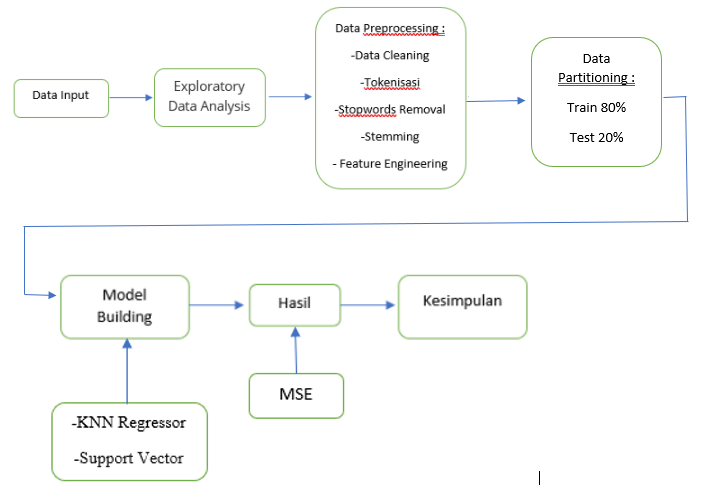

Penjelasan Blok Diagram :
1. Proses pengambilan data.
2. Step selanjutnya adalah proses eksplorasi data, untuk menganalisa feature yang ada pada data. Data frame terdiri dari 4 kolom (jawaban mahasiswa, jawaban dosen, human rater, dan human rater scaled). Pada proses ini,ditambahkan 1 feature baru yaitu 'kategori' yang digunakan agar penulis dapat melihat distribusi data, sehingga dapat mengetahui apakah distribusi data balanced atau tidak.
3. Selanjutnya adalah tahap data preprocessing. Sebelum melakukan proses pembuatan model, perlu dilakukannya sebuah tahapan untuk merubah data mentah yang memilki struktur yang kurang baik menjadi baik sesuai kebutuhan untuk proses NLP. Untuk itu perlu dilakukannya tahap awal sebelum data tersebut digunakan dalam proses NLP. Tahap ini biasa disebut tahap Text Preprocessing [5]. Pada tahap ini dilakukan pembersihan data, tokenisasi, stopword removal, stemming, dan feature engineering. 
4. Setelah melakukan data preprocessing, dilakukan pembuatan model. Pada percobaan kali ini, model yang digunakan adalah KNN dan SVR.
5. Setelah itu, hasil dari data yang telah ditrain menggunakan algoritma diatas direpresentasikan menggunakan mean squared error kemudian ditampilkan dalam bentuk grafik perbandingan data train dan test.
6. Proses terakhir yang dilakukan adalah pembuatan kesimpulan dari percobaan yang telah dilakukan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_esay grading.csv to dataset_esay grading.csv


In [ ]:
df = pd.read_csv('dataset_esay grading.csv')

In [ ]:
df

,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled
0,komputer menggunakan layanan tersedia jaringan,client server jaringan komputer model komunika...,20,0.2
1,fundamental centralized infrastructure,client server jaringan komputer model komunika...,20,0.2
2,hubungan komponen jaringan berkomunikasi,client server jaringan komputer model komunika...,30,0.3
3,client server jaringan komunikasi client serve...,client server jaringan komputer model komunika...,40,0.4
4,client server jaringan 2 buah cliet 1 server s...,client server jaringan komputer model komunika...,40,0.4
...,...,...,...,...
215,turbo boost sistem diberikan produsen prosesor...,turbo boost salah satu fitur prosesor masa ber...,70,0.7
216,turbo boost mempercepat kinerja processor memi...,turbo boost salah satu fitur prosesor masa ber...,80,0.8
217,turbo boost kondisi dimana terjadi penambahan ...,turbo boost salah satu fitur prosesor masa ber...,60,0.6
218,turbo boost fitur prosesor untuk meningkatkan ...,turbo boost salah satu fitur prosesor masa ber...,80,0.8


EDA

In [ ]:
df['kategori'] = df['jawaban_dosen'].astype('category').cat.codes
df

,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled,kategori
0,komputer menggunakan layanan tersedia jaringan,client server jaringan komputer model komunika...,20,0.2,0
1,fundamental centralized infrastructure,client server jaringan komputer model komunika...,20,0.2,0
2,hubungan komponen jaringan berkomunikasi,client server jaringan komputer model komunika...,30,0.3,0
3,client server jaringan komunikasi client serve...,client server jaringan komputer model komunika...,40,0.4,0
4,client server jaringan 2 buah cliet 1 server s...,client server jaringan komputer model komunika...,40,0.4,0
...,...,...,...,...,...
215,turbo boost sistem diberikan produsen prosesor...,turbo boost salah satu fitur prosesor masa ber...,70,0.7,3
216,turbo boost mempercepat kinerja processor memi...,turbo boost salah satu fitur prosesor masa ber...,80,0.8,3
217,turbo boost kondisi dimana terjadi penambahan ...,turbo boost salah satu fitur prosesor masa ber...,60,0.6,3
218,turbo boost fitur prosesor untuk meningkatkan ...,turbo boost salah satu fitur prosesor masa ber...,80,0.8,3


In [ ]:
data_train = df.iloc[0:int(len(df)*0.8)]
data_test = df.iloc[176:]


In [ ]:
data_train.to_csv(r'data_train.csv')
data_test.to_csv(r'data_test.csv')

In [ ]:
print(df['kategori'].nunique())
df['kategori'].unique()

4


array([0, 1, 2, 3], dtype=int8)

In [ ]:
df.isnull().sum()

jawaban_mahasiswa     0
jawaban_dosen         0
human_rater           0
human_rater_scaled    0
kategori              0
dtype: int64

In [ ]:
import plotly.graph_objs as go

labels = df['kategori'].value_counts().index
values = df['kategori'].value_counts().values

colors = df['kategori']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors, line=dict(color='#000000', width=2)), 
                              title = "Distribution of sets of essay")])

fig.show()

print(df.groupby('kategori').size())


kategori
0    55
1    55
2    55
3    55
dtype: int64


## Preprocessing

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_symbol(text):
    # Menghapus tab, new line, dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # Menghapus non ASCII (emoticon, chinese word, dst)
    text = text.encode('ascii', 'replace').decode('ascii')
    # Menghapus simbol mention, link, hashtag, tanda baca, dst
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

Preprocessing data jawaban mahasiswa

In [ ]:
# Menghapus nomor
def remove_number(text):
    return  re.sub(r"\d+", "", text)
df['jawaban_mahasiswa'] = df['jawaban_mahasiswa'].apply(remove_number)

# Menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
df['jawaban_mahasiswa'] = df['jawaban_mahasiswa'].apply(remove_punctuation)

# Menghapus whitespace leading & trailing (karakter kosong)
def remove_whitespace_LT(text):
    return text.strip()
df['jawaban_mahasiswa'] = df['jawaban_mahasiswa'].apply(remove_whitespace_LT)


In [ ]:
df

,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled,kategori
0,komputer menggunakan layanan tersedia jaringan,client server jaringan komputer model komunika...,20,0.2,0
1,fundamental centralized infrastructure,client server jaringan komputer model komunika...,20,0.2,0
2,hubungan komponen jaringan berkomunikasi,client server jaringan komputer model komunika...,30,0.3,0
3,client server jaringan komunikasi client serve...,client server jaringan komputer model komunika...,40,0.4,0
4,client server jaringan buah cliet server sat...,client server jaringan komputer model komunika...,40,0.4,0
...,...,...,...,...,...
215,turbo boost sistem diberikan produsen prosesor...,turbo boost salah satu fitur prosesor masa ber...,70,0.7,3
216,turbo boost mempercepat kinerja processor memi...,turbo boost salah satu fitur prosesor masa ber...,80,0.8,3
217,turbo boost kondisi dimana terjadi penambahan ...,turbo boost salah satu fitur prosesor masa ber...,60,0.6,3
218,turbo boost fitur prosesor untuk meningkatkan ...,turbo boost salah satu fitur prosesor masa ber...,80,0.8,3


Tokenisasi

Tekenization adalah sebuah proses memisahkan sekumpulan teks menjadi kata, frasa, simbol atau elemen yang memiliki makna lainnya yang disebut token

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['jawaban_mahasiswa'] = df['jawaban_mahasiswa'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing : \n') 
print(df['jawaban_mahasiswa'].head())

Hasil Tokenizing : 

0    [komputer, menggunakan, layanan, tersedia, jar...
1           [fundamental, centralized, infrastructure]
2        [hubungan, komponen, jaringan, berkomunikasi]
3    [client, server, jaringan, komunikasi, client,...
4    [client, server, jaringan, buah, cliet, server...
Name: jawaban_mahasiswa, dtype: object


Removing Stopwords

Stopword removal bertujuan untuk membuang kata-kata yang kurang relevan dalam
teks/kalimat. Pada NLTK Bahasa Inggris fungsi stopword removal menggunakan
korpus stopword Bahasa Inggris. Hal ini menjadi alasan mengapa fungsi stopword
removal pada NLTK Bahasa Inggris tidak dapat diterapkan langsung pada Bahasa
Indonesia. Agar dapat diterapkan pada Bahasa Indonesia harus menggunakan korpus
stopword Bahasa Indonesia [5]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('indonesian'))

'ada, adalah, adanya, adapun, agak, agaknya, agar, akan, akankah, akhir, akhiri, akhirnya, aku, akulah, amat, amatlah, anda, andalah, antar, antara, antaranya, apa, apaan, apabila, apakah, apalagi, apatah, artinya, asal, asalkan, atas, atau, ataukah, ataupun, awal, awalnya, bagai, bagaikan, bagaimana, bagaimanakah, bagaimanapun, bagi, bagian, bahkan, bahwa, bahwasanya, baik, bakal, bakalan, balik, banyak, bapak, baru, bawah, beberapa, begini, beginian, beginikah, beginilah, begitu, begitukah, begitulah, begitupun, bekerja, belakang, belakangan, belum, belumlah, benar, benarkah, benarlah, berada, berakhir, berakhirlah, berakhirnya, berapa, berapakah, berapalah, berapapun, berarti, berawal, berbagai, berdatangan, beri, berikan, berikut, berikutnya, berjumlah, berkali-kali, berkata, berkehendak, berkeinginan, berkenaan, berlainan, berlalu, berlangsung, berlebihan, bermacam, bermacam-macam, bermaksud, bermula, bersama, bersama-sama, bersiap, bersiap-siap, bertanya, bertanya-tanya, berturut

In [ ]:
STOPWORDS = set(stopwords.words('indonesian'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["jawaban_mahasiswa"] = df["jawaban_mahasiswa"].apply(lambda text: remove_stopwords(text))
df.head()

,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled,kategori
0,"['komputer', 'menggunakan', 'layanan', 'tersed...",client server jaringan komputer model komunika...,20,0.2,0
1,"['fundamental', 'centralized', 'infrastructure']",client server jaringan komputer model komunika...,20,0.2,0
2,"['hubungan', 'komponen', 'jaringan', 'berkomun...",client server jaringan komputer model komunika...,30,0.3,0
3,"['client', 'server', 'jaringan', 'komunikasi',...",client server jaringan komputer model komunika...,40,0.4,0
4,"['client', 'server', 'jaringan', 'buah', 'clie...",client server jaringan komputer model komunika...,40,0.4,0


In [ ]:
pip install sastrawi

     |████████████████████████████████| 215kB 5.0MB/s 


Stemming

Stemming merupakan suatu proses atau cara untuk menemukan kata dasar dari suatu
kata. Sebagai contoh, kata “bersama”, “menyamai”, “kebersamaan” akan diubah
menjadi kata dasar “sama”. Stemming digunakan untuk mengganti bentuk dari suatu
kata menjadi kata dasar dari kata tersebut yang sesuai dengan struktur morfologi
bahasa Indonesia yang benar [4].




In [ ]:
df

,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled,kategori
0,"['komputer', 'menggunakan', 'layanan', 'tersed...",client server jaringan komputer model komunika...,20,0.2,0
1,"['fundamental', 'centralized', 'infrastructure']",client server jaringan komputer model komunika...,20,0.2,0
2,"['hubungan', 'komponen', 'jaringan', 'berkomun...",client server jaringan komputer model komunika...,30,0.3,0
3,"['client', 'server', 'jaringan', 'komunikasi',...",client server jaringan komputer model komunika...,40,0.4,0
4,"['client', 'server', 'jaringan', 'buah', 'clie...",client server jaringan komputer model komunika...,40,0.4,0
...,...,...,...,...,...
215,"['turbo', 'boost', 'sistem', 'diberikan', 'pro...",turbo boost salah satu fitur prosesor masa ber...,70,0.7,3
216,"['turbo', 'boost', 'mempercepat', 'kinerja', '...",turbo boost salah satu fitur prosesor masa ber...,80,0.8,3
217,"['turbo', 'boost', 'kondisi', 'dimana', 'terja...",turbo boost salah satu fitur prosesor masa ber...,60,0.6,3
218,"['turbo', 'boost', 'fitur', 'prosesor', 'untuk...",turbo boost salah satu fitur prosesor masa ber...,80,0.8,3


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

text = [row['jawaban_mahasiswa'] for index,row in df.iterrows()]
df["Stemmed_jawabanmhs"] = list(map(stemmer.stem, text))
print("\033[1m\u001b[45;1m Teks setelah Stemming:\033[0m",*df["Stemmed_jawabanmhs"][:5], sep = "\n")

 Teks setelah Stemming:
komputer guna layan sedia jaring
fundamental centralized infrastructure
hubung komponen jaring komunikasi
client server jaring komunikasi client server komputer client sedia informasi software butuh client nya komputer client punya akses untuk ambil informasi sedia komputer server
client server jaring buah cliet server satu jaring


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3))
count_vectors = vectorizer.fit_transform(df['jawaban_mahasiswa'])
feature_names = vectorizer.get_feature_names()
df_n = df[['jawaban_mahasiswa','jawaban_dosen','human_rater_scaled']].copy()
X = count_vectors.toarray()
y = df_n['human_rater_scaled'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Model Building

# K-Nearest Neigbor
KNN
KNN Regresi, merupakan algoritma yang
memberikan pengenalan ke K-terdekat regresi
tetangga yang dasar pendekatan Unsupervised KNearest Neighbor atau UNN, yang mana dalam
regresi adalah untuk memprediksi nilai output. Ide
KNN didasarkan pada asumsi lokalitas di ruang
data. Dalam lingkungan lokal pola x
diharapkan memiliki nilai output yang sama y (atau
label kelas) untuk f(x). Akibatnya, untuk x′
diketahui label harus mirip dengan label dari pola
terdekat, yang dimodelkan dengan rata-rata nilai
output dari sampel terdekat K [1]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=(4), weights= 'distance', algorithm = 'kd_tree', leaf_size = 10)
knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)
predictions = knn.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, y_pred_knn))

Mean squared error:  0.21199110277146785


In [ ]:
data_comp_knn = pd.DataFrame({'test': y_test, 'pred': y_pred})
data_comp_knn

,test,pred
0,0.8,0.791695
1,0.7,0.816156
2,0.6,0.546169
3,0.4,0.481598
4,1.0,0.785292
5,0.9,0.653326
6,1.0,0.788154
7,1.0,0.633840
8,0.8,0.725490
9,0.9,0.717221


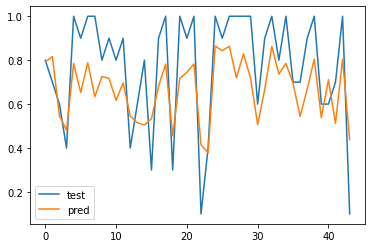

In [ ]:
data_comp_knn.plot()

## SVR
Support Vector Regression (SVR) merupakan pengembangan SVM untuk kasus
regresi. Tujuan dari SVR adalah untuk menemukan sebuah fungsi sebagai suatu
hyperplane (garis pemisah) berupa fungsi regresi yang mana sesuai dengan semua
input data dengan sebuah error dan membuat setipis mungkin [3]

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

y_pred_svr=clf.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test,y_pred_svr))

Mean squared error:  0.03735972631926829


In [ ]:
data_comp_svr = pd.DataFrame({'test': y_test, 'pred': y_pred})
data_comp_svr

,test,pred
0,0.8,0.791695
1,0.7,0.816156
2,0.6,0.546169
3,0.4,0.481598
4,1.0,0.785292
5,0.9,0.653326
6,1.0,0.788154
7,1.0,0.633840
8,0.8,0.725490
9,0.9,0.717221


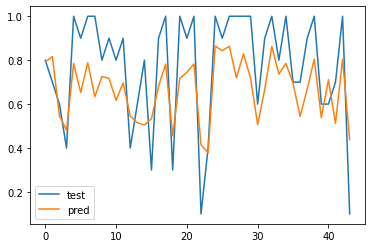

In [ ]:
data_comp_svr.plot()